In [45]:
import numpy
import numpy.ma

from pyiem.util import get_dbconn

ASOS = get_dbconn("asos")
acursor = ASOS.cursor()
data = numpy.ma.zeros((366, 2013 - 1960), "f")
data.mask = numpy.where(data == 0, True, False)

# 1050-950
grid = numpy.ma.zeros((100, 366), "f")

for year in range(1960, 2013):
    acursor.execute(
        """SELECT date(valid) as d, avg(mslp) from t%s WHERE
station = '%s' and mslp > 900 and mslp < 1100 GROUP by d"""
        % (year, "DSM")
    )
    for row in acursor:
        data[int(row[0].strftime("%j")) - 1, year - 1960] = row[1]
        grid[(int(row[1]) - 950) / 2, int(row[0].strftime("%j")) - 1] += 1.0

grid.mask = numpy.where(grid == 0, True, False)

NameError: name 'numpy' is not defined

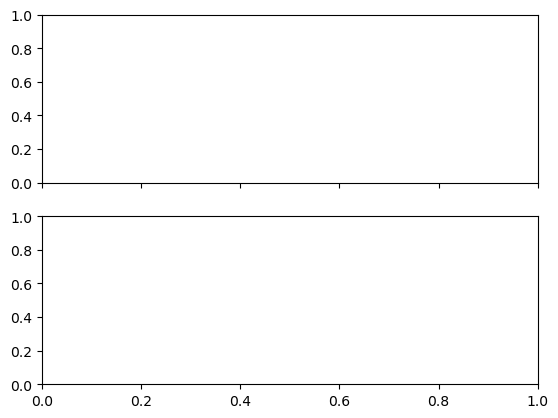

In [1]:
import matplotlib.pyplot as plt

(fig, ax) = plt.subplots(2, 1, sharex=True)

for year in range(1960, 2013):
    c = "tan"
    if year == 2012:
        c = "k"
    ax[0].plot(numpy.arange(366), data[:, year - 1960], color=c)
ax[0].grid(True)
ax[0].set_title(
    "1960-2012 Des Moines Sea Level Pressure Climatology\nAll Observations plotted with 2012 (thru 17 Oct) in black"
)
ax[0].set_ylabel("MSLP [mb]")

res = ax[1].imshow(grid / 52.0, aspect="auto", rasterized=True)
# clr = fig.colorbar(res)
ax[1].set_ylim(15, 50)
ax[1].set_yticks(numpy.arange(15, 51, 5))
ax[1].set_yticklabels(numpy.arange(980, 1051, 10))
ax[1].grid(True)
ax[1].set_xticks((1, 31, 59, 90, 120, 151, 181, 212, 243, 274, 303, 334))
ax[1].set_xticklabels(
    (
        "Jan",
        "Feb",
        "Mar",
        "Apr",
        "May",
        "Jun",
        "Jul",
        "Aug",
        "Sep",
        "Oct",
        "Nov",
        "Dec",
    )
)
ax[1].set_title("Relative Frequency (2mb daily bin)")
ax[1].set_ylabel("MSLP [mb]")

fig.savefig("test.png")